In [1]:
import numpy as np
from sklearn import datasets, model_selection, metrics
import matplotlib.pyplot as plt

# Importing our from scratch models
from decision_tree import DecisionTree
from random_forest import RandomForestClassifier

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# DecisionTree Examples

## Training on Iris Dataset

In [2]:
iris = datasets.load_iris()

X = np.array(iris.data)
Y = np.array(iris.target)
iris_feature_names = iris.feature_names

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)
print("Train Shape:", X_train.shape)
print("Train Shape:", X_test.shape)

Train Shape: (112, 4)
Train Shape: (38, 4)


In [3]:
# Building the tree
my_tree = DecisionTree(max_depth=4, min_samples_leaf=1, min_information_gain=0)
my_tree.train(X_train, Y_train)

In [4]:
# Let's see the tree
my_tree.print_tree()

                                                                -> LEAF | Label Counts = 0.0->4 | Pred Probs = [1. 0. 0.]
                                                -> NODE | Information Gain = 0.0 | Split IF X[0] < 4.8 THEN left O/W right
                                                                -> LEAF | Label Counts = 0.0->6 | Pred Probs = [1. 0. 0.]
                                -> NODE | Information Gain = 0.998363672593813 | Split IF X[2] < 3.0 THEN left O/W right
                                                                -> LEAF | Label Counts = 1.0->5 | Pred Probs = [0. 1. 0.]
                                                -> NODE | Information Gain = 0.0 | Split IF X[0] < 5.6 THEN left O/W right
                                                                -> LEAF | Label Counts = 1.0->6 | Pred Probs = [0. 1. 0.]
                -> NODE | Information Gain = 0.33977167868466684 | Split IF X[1] < 3.2 THEN left O/W right
                                      

In [5]:
# Let's see the Train performance
train_preds = my_tree.predict(X_set=X_train)
print("TRAIN PERFORMANCE")
print("Train size", len(Y_train))
print("True preds", sum(train_preds == Y_train))
print("Train Accuracy", sum(train_preds == Y_train) / len(Y_train))

TRAIN PERFORMANCE
Train size 112
True preds 108
Train Accuracy 0.9642857142857143


In [6]:
# Let's see the Test performance
test_preds = my_tree.predict(X_set=X_test)
print("TEST PERFORMANCE")
print("Test size", len(Y_test))
print("True preds", sum(test_preds == Y_test))
print("Accuracy", sum(test_preds == Y_test) / len(Y_test))

TEST PERFORMANCE
Test size 38
True preds 34
Accuracy 0.8947368421052632


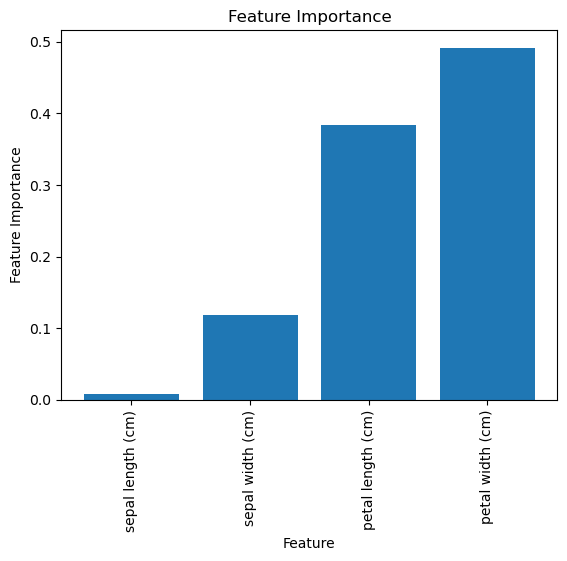

In [7]:
# Feature importance
plt.bar(range(len(my_tree.feature_importances)), 
        list(my_tree.feature_importances.values()), tick_label=iris_feature_names)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.ylabel("Feature Importance")
plt.show()

## Training on Breast Cancer Dataset

In [8]:
# Load data
data = datasets.load_breast_cancer()
X = data.data
Y = data.target
breast_cancer_feature_names = data.feature_names

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=0)
print("Train Shape:", X_train.shape)
print("Train Shape:", X_test.shape)

Train Shape: (455, 30)
Train Shape: (114, 30)


In [9]:
# Building the tree
my_tree_2 = DecisionTree(max_depth=4, min_samples_leaf=5, min_information_gain=0.05)
my_tree_2.train(X_train, Y_train)

In [10]:
my_tree_2.print_tree()

                -> LEAF | Label Counts = 0.0->5, 1.0->222 | Pred Probs = [0.02202643 0.97797357]
-> NODE | Information Gain = 0.42814844913368955 | Split IF X[20] < 14.85 THEN left O/W right
                                                                -> LEAF | Label Counts = 0.0->4, 1.0->24 | Pred Probs = [0.14285714 0.85714286]
                                                -> NODE | Information Gain = 0.07593173535500958 | Split IF X[9] < 0.05718 THEN left O/W right
                                                                -> LEAF | Label Counts = 1.0->29 | Pred Probs = [0. 1.]
                                -> NODE | Information Gain = 0.3922674180993554 | Split IF X[26] < 0.2649 THEN left O/W right
                                                                -> LEAF | Label Counts = 0.0->16, 1.0->12 | Pred Probs = [0.57142857 0.42857143]
                                                -> NODE | Information Gain = 0.13607900591488808 | Split IF X[8] < 0.1908 THEN left

In [11]:
# Let's see the Train performance
train_preds = my_tree_2.predict(X_set=X_train)
print("TRAIN PERFORMANCE")
print("Train size", len(Y_train))
print("True preds", sum(train_preds == Y_train))
print("Train Accuracy", sum(train_preds == Y_train) / len(Y_train))

TRAIN PERFORMANCE
Train size 455
True preds 431
Train Accuracy 0.9472527472527472


In [12]:
# Let's see the Test performance
test_preds = my_tree_2.predict(X_set=X_test)
print("TEST PERFORMANCE")
print("Test size", len(Y_test))
print("True preds", sum(test_preds == Y_test))
print("Accuracy", sum(test_preds == Y_test) / len(Y_test))

TEST PERFORMANCE
Test size 114
True preds 108
Accuracy 0.9473684210526315


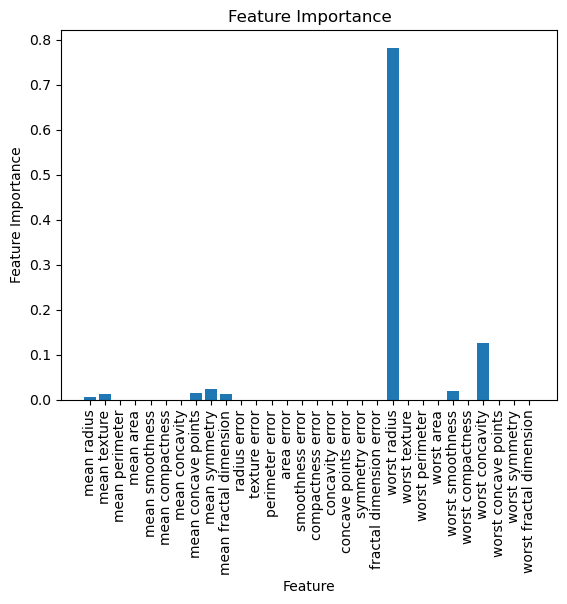

In [13]:
# Feature importance
plt.bar(range(len(my_tree_2.feature_importances)), 
        list(my_tree_2.feature_importances.values()), tick_label=breast_cancer_feature_names)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()

## Training on Diabetes Data (from OpenML)

In [40]:
diabetes = datasets.fetch_openml(name="diabetes", as_frame=False)

In [41]:
diabetes_features = np.array(diabetes.data)
print(diabetes_features.shape)
diabetes_labels = np.array([y=="tested_positive" for y in diabetes.target]).astype(int)
print(diabetes_labels.shape)

(768, 8)
(768,)


In [42]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(diabetes_features, diabetes_labels, test_size=0.2, random_state=0)

In [43]:
# Lets see how model performs with different max_depth thresholds

train_accuracy_dict = {}
test_accuracy_dict = {}
# depth_occured = {}

for depth in range(2, 21):
    tree_model = DecisionTree(max_depth=depth, min_samples_leaf=1)
    tree_model.train(X_train, Y_train)

    # depth_occured[depth] = tree_model.current_de

    # Train performance
    train_preds = tree_model.predict(X_set=X_train)
    train_accuracy = sum(train_preds == Y_train) / len(Y_train)
    train_accuracy_dict[depth] = train_accuracy

    # Test performance
    test_preds = tree_model.predict(X_set=X_test)
    test_accuracy = sum(test_preds == Y_test) / len(Y_test)
    test_accuracy_dict[depth] = test_accuracy

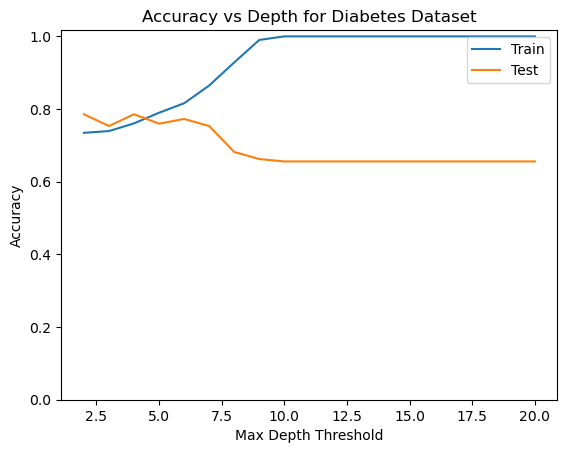

In [44]:
plt.plot(train_accuracy_dict.keys(), train_accuracy_dict.values(), label="Train")
plt.plot(test_accuracy_dict.keys(), test_accuracy_dict.values(), label="Test")
plt.title("Accuracy vs Depth for Diabetes Dataset")
plt.xlabel("Max Depth Threshold")
plt.ylabel("Accuracy")
plt.legend()
plt.ylim(bottom=0.0)
plt.show()

#### We can see that the tree starts to overfit after max_depth exceeds 5

In [45]:
opt_tree_model = DecisionTree(max_depth=5, min_samples_leaf=1)
opt_tree_model.train(X_train, Y_train)

In [46]:
train_preds = opt_tree_model.predict(X_set=X_train)
print("TRAIN PERFORMANCE")
print("Train size", len(Y_train))
print("True preds", sum(train_preds == Y_train))
print("Accuracy", sum(train_preds == Y_train) / len(Y_train))

test_preds = opt_tree_model.predict(X_set=X_test)
print("TEST PERFORMANCE")
print("Test size", len(Y_test))
print("True preds", sum(test_preds == Y_test))
print("Accuracy", sum(test_preds == Y_test) / len(Y_test))

TRAIN PERFORMANCE
Train size 614
True preds 485
Accuracy 0.7899022801302932
TEST PERFORMANCE
Test size 154
True preds 117
Accuracy 0.7597402597402597


In [47]:
opt_tree_model.print_tree()

                                                                                -> LEAF | Label Counts = 0.0->16 | Pred Probs = [1. 0.]
                                                                -> NODE | Information Gain = 0.03197729100420771 | Split IF X[1] < 94.5 THEN left O/W right
                                                                                -> LEAF | Label Counts = 0.0->15, 1.0->1 | Pred Probs = [0.9375 0.0625]
                                                -> NODE | Information Gain = 0.01624347731396683 | Split IF X[3] < 17.0 THEN left O/W right
                                                                                -> LEAF | Label Counts = 0.0->6 | Pred Probs = [1. 0.]
                                                                -> NODE | Information Gain = 0.0 | Split IF X[0] < 1.0 THEN left O/W right
                                                                                -> LEAF | Label Counts = 0.0->31 | Pred Probs = [1. 0.]
      

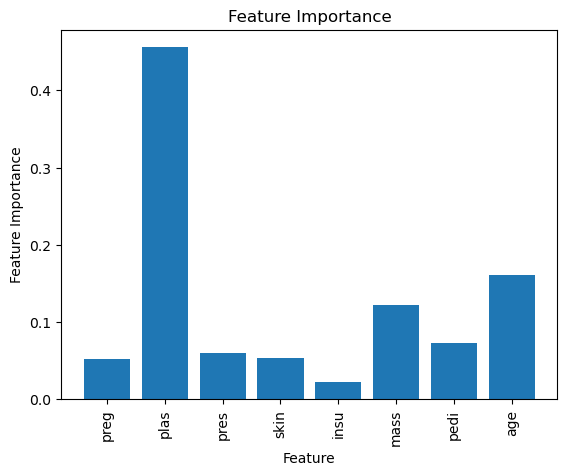

In [48]:
# Feature importance
plt.bar(range(len(opt_tree_model.feature_importances)), 
        list(opt_tree_model.feature_importances.values()), tick_label=diabetes.feature_names)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()

# Random Forest Examples

## Training on Iris Dataset

In [49]:
iris = datasets.load_iris()

X = np.array(iris.data)
Y = np.array(iris.target)
iris_feature_names = iris.feature_names

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)
print("Train Shape:", X_train.shape)
print("Train Shape:", X_test.shape)

Train Shape: (112, 4)
Train Shape: (38, 4)


In [50]:
# Building random forest model
rf_model = RandomForestClassifier(n_base_learner=50, numb_of_features_splitting="sqrt")
rf_model.train(X_train, Y_train)

In [51]:
# Performans increases when compared to the basic DecisionTree
train_preds = rf_model.predict(X_set=X_train)
print("TRAIN PERFORMANCE")
print("Train size", len(Y_train))
print("True preds", sum(train_preds == Y_train))
print("Accuracy", sum(train_preds == Y_train) / len(Y_train))

test_preds = rf_model.predict(X_set=X_test)
print("TEST PERFORMANCE")
print("Test size", len(Y_test))
print("True preds", sum(test_preds == Y_test))
print("Accuracy", sum(test_preds == Y_test) / len(Y_test))

TRAIN PERFORMANCE
Train size 112
True preds 110
Accuracy 0.9821428571428571
TEST PERFORMANCE
Test size 38
True preds 36
Accuracy 0.9473684210526315


## Training on Breast Cancer Dataset

In [52]:
# Load data
data = datasets.load_breast_cancer()
X = data.data
Y = data.target
breast_cancer_feature_names = data.feature_names

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=0)
print("Train Shape:", X_train.shape)
print("Train Shape:", X_test.shape)

Train Shape: (455, 30)
Train Shape: (114, 30)


In [53]:
# Building random forest model
rf_model_2 = RandomForestClassifier(n_base_learner=100, 
                                    max_depth=4, min_samples_leaf=5, min_information_gain=0.05)
rf_model_2.train(X_train, Y_train)

In [54]:
# Performans increases when compared to the basic DecisionTree
train_preds = rf_model_2.predict(X_set=X_train)
print("TRAIN PERFORMANCE")
print("Train size", len(Y_train))
print("True preds", sum(train_preds == Y_train))
print("Accuracy", sum(train_preds == Y_train) / len(Y_train))

test_preds = rf_model_2.predict(X_set=X_test)
print("TEST PERFORMANCE")
print("Test size", len(Y_test))
print("True preds", sum(test_preds == Y_test))
print("Accuracy", sum(test_preds == Y_test) / len(Y_test))

TRAIN PERFORMANCE
Train size 455
True preds 441
Accuracy 0.9692307692307692
TEST PERFORMANCE
Test size 114
True preds 110
Accuracy 0.9649122807017544


## Training on Diabetes Data (from OpenML)

In [55]:
diabetes = datasets.fetch_openml(name="diabetes", as_frame=False)

In [56]:
diabetes_features = np.array(diabetes.data)
print(diabetes_features.shape)
diabetes_labels = np.array([y=="tested_positive" for y in diabetes.target]).astype(int)
print(diabetes_labels.shape)

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(diabetes_features, diabetes_labels, test_size=0.2, random_state=0)

(768, 8)
(768,)


In [57]:
rf_model_3 = RandomForestClassifier(n_base_learner=200, numb_of_features_splitting=None,
                                     max_depth=5, min_samples_leaf=1)
rf_model_3.train(X_train, Y_train)

In [58]:
# Performance increases when compared to basic decision tree
train_preds = rf_model_3.predict(X_set=X_train)
print("TRAIN PERFORMANCE")
print("Train size", len(Y_train))
print("True preds", sum(train_preds == Y_train))
print("Accuracy", sum(train_preds == Y_train) / len(Y_train))

test_preds = rf_model_3.predict(X_set=X_test)
print("TEST PERFORMANCE")
print("Test size", len(Y_test))
print("True preds", sum(test_preds == Y_test))
print("Accuracy", sum(test_preds == Y_test) / len(Y_test))

TRAIN PERFORMANCE
Train size 614
True preds 503
Accuracy 0.8192182410423453
TEST PERFORMANCE
Test size 154
True preds 123
Accuracy 0.7987012987012987


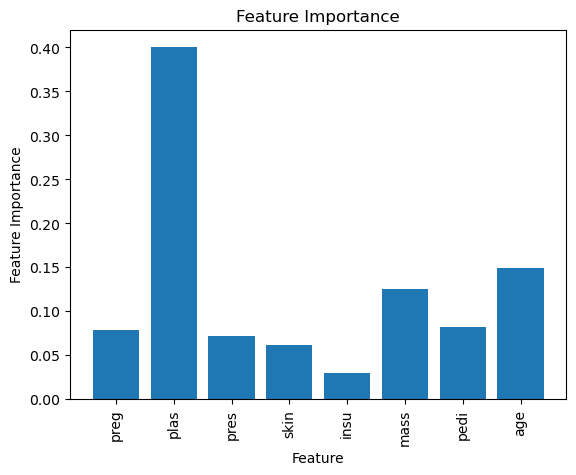

In [59]:
# Feature importance of RandomForest Model
plt.bar(range(len(rf_model_3.feature_importances)), 
        list(rf_model_3.feature_importances), tick_label=diabetes.feature_names)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()